In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('titanic-passengers.csv')
df.head()


,PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked
343;No;2;Collander,Mr. Erik Gustaf;male;28.0;0;0;248740;13.0;;S
76;No;3;Moen,Mr. Sigurd Hansen;male;25.0;0;0;348123;7.65;F...
641;No;3;Jensen,Mr. Hans Peder;male;20.0;0;0;350050;7.8542000...
568;No;3;Palsson,Mrs. Nils (Alma Cornelia Berglund);female;29....
672;No;1;Davidson,Mr. Thornton;male;31.0;1;0;F.C. 12750;52.0;B71;S


 *  we observe that our dataframe is Rowso weshould use the "sep" to edit it 

In [2]:
df=pd.read_csv('titanic-passengers.csv',sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.shape

(891, 12)

* we also observe that "Age & Embarked" has some empty values and "Cabin" has has a many lessvalues

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* "Survived" has two uniques values 'Yes' or 'No' and we notice that most passengers were die  
* "Sex" alsohas two uniques values where top appear value is 'male' 
* here we notice that "Ticket" has more then 200  dupicates values 
* "Cabin" has 50 duplicates values with 'G6' as top value
* "Embarked" has 3 categories with 'S' like top value

In [6]:
df.describe(include=['O'])

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Collander, Mr. Erik Gustaf",male,CA. 2343,G6,S
freq,549,1,577,7,4,644


* so we need to fill  the NaN or empty values in "Age" cuz it s important columns

In [7]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


*  we 'll plot the correlation btw "Sex" & "Age"
# observation :
* most of 'male' & 'female' have 30 years old or  are btw 15-40 years-old 
* max of 'male' age is 80 years 
* max of 'female' age is 60 years
* so the older passenger has 80 years old 


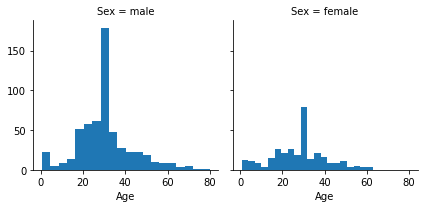

In [9]:
S=sns.FacetGrid(df,col='Sex')
S.map(plt.hist,'Age',bins=20)

# observation :
* most passengers in "Pclass=1" ar survived in range of age btw 20-60 years
* in "Pclass=2" the chance of survivding  was equal but i think mostly are survived with range of age btw 0-40 years
* most of "Pclass=3" are not survived with range of  age btw 0-55 years

/home/malek/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


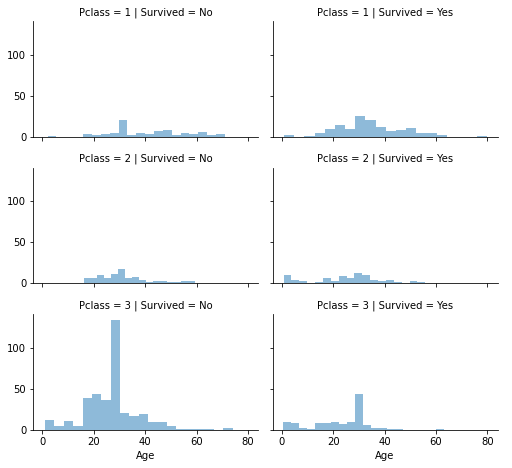

In [10]:
# sns.catplot(x='Pclass',y='Age',data=df,hue='Survived')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# observation:
* "Embarked=C" is the most embarked that passengers survived espatialy "Female"
* the passengers pay high fare were survived 


/home/malek/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/malek/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


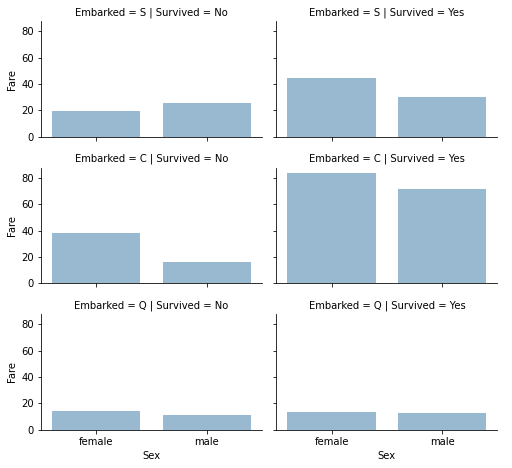

In [11]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

* exucution of the function 'plot_correlation_map'

In [12]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

# observation : 
* we notice that the strongest correlation except the main diagonal is between "SibSp" & "Parch" with 0.41 then btw "Parch" & "Fare" with  0.22 and btw "SibSp" & "Fare" with 0.16 ""
* we notice that the  weakest correlation is btw "Pclass" & "Fare" with  -0.55


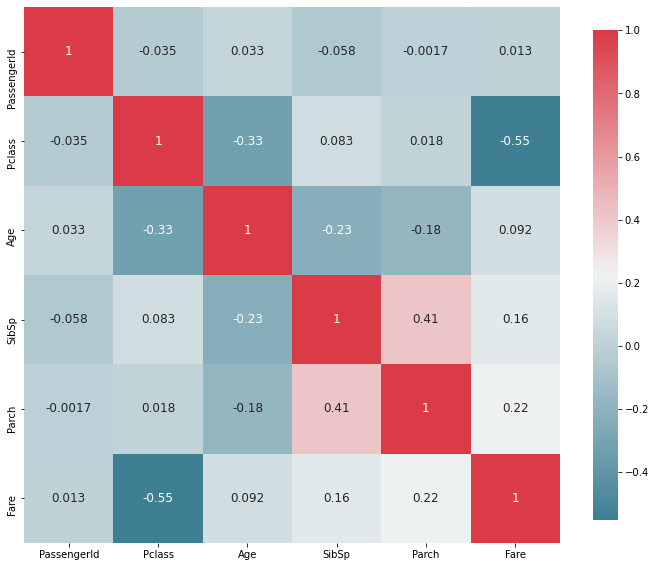

In [13]:
plot_correlation_map(df)

# Survived : categorical to numerical 
* we notice that 62% of "Pclass=1" are survived 
* and for "Pclass=2" it s about 47%  & 24% for "Pclass=3"

In [14]:
clean_up={"Survived":{"Yes":1, "No": 0}}  
df.replace(clean_up, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# Extract 'Title' from 'Name'

In [15]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


In [16]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Lady          1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Countess      1
Ms            1
Name: Title, dtype: int64

 *  we delete impraticale columns like :
        'Name' cuz we have 'Title' 
        'Cabin' cuz have many NaN values
        'Ticket' cuz has duplicate values
        'passengerID' cuz it s not praticale

In [17]:
df=df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.0,0,0,13.0000,S,Mr
1,0,3,male,25.0,0,0,7.6500,S,Mr
2,0,3,male,20.0,0,0,7.8542,S,Mr
3,0,3,female,29.0,0,4,21.0750,S,Mrs
4,0,1,male,31.0,1,0,52.0000,S,Mr


# Obesrvation : 
* there are 17 categoris of passengers
* 'Pclass' : most of "Pclass=1" are survived 
* 'Age': the age range of 'Title' categories is btw 20-60 years old
*  'Sex' : most survived are  'female'
*  'Fare': most passengers pay 0 to 300 and most of them are survived 
* 'SibSp' : most passengers that have 0 SibSp are survived 
* 'Parche' also most passsengers that have 0 Parch are survived cuz we saw before that 'SibSP' and 'Parch' are correled 

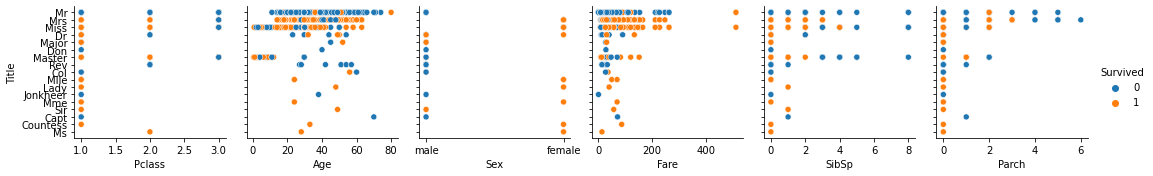

In [18]:
x_vars = ["Pclass","Age","Sex","Fare",'SibSp','Parch']
y_vars = ["Title"]
g = sns.PairGrid(df,hue="Survived", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

we use the Title dictionary to minimize the number of Title categoris 

In [19]:
Title_Dictionary = { 'Title':{

                      "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" , 

                  "the Countess":  "Royalty",

                    "Dona":       "Royalty" ,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"
                    }}
df.replace(Title_Dictionary ,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.000000,0,0,13.0000,S,Mrs
1,0,3,male,25.000000,0,0,7.6500,S,Mrs
2,0,3,male,20.000000,0,0,7.8542,S,Mrs
3,0,3,female,29.000000,0,4,21.0750,S,Mrs
4,0,1,male,31.000000,1,0,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C,Mrs
887,0,3,male,22.000000,0,0,7.2292,C,Mrs
888,0,3,female,30.000000,0,0,8.6625,S,Miss
889,0,3,male,29.699118,0,0,7.8958,S,Mrs


we minimize the categories from 17 catgs to  6 catgs

In [20]:
df['Title'].value_counts()

Mrs         643
Miss        185
Master       40
Officer      18
Royalty       4
Countess      1
Name: Title, dtype: int64

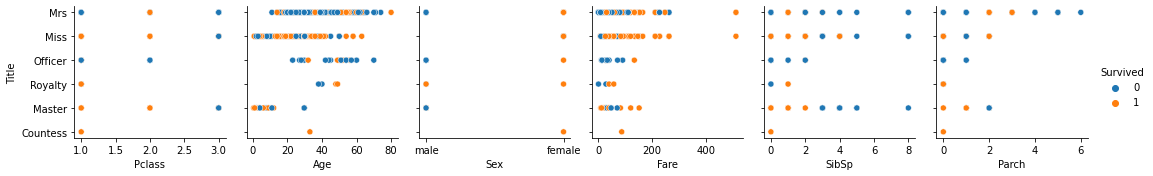

In [21]:
x_vars = ["Pclass","Age","Sex","Fare",'SibSp','Parch']
y_vars = ["Title"]
g = sns.PairGrid(df,hue="Survived", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [22]:
df['FamilySize'] = df['SibSp'] + df['Parch'] 
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,male,28.000000,0,0,13.0000,S,Mrs,0
1,0,3,male,25.000000,0,0,7.6500,S,Mrs,0
2,0,3,male,20.000000,0,0,7.8542,S,Mrs,0
3,0,3,female,29.000000,0,4,21.0750,S,Mrs,4
4,0,1,male,31.000000,1,0,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C,Mrs,1
887,0,3,male,22.000000,0,0,7.2292,C,Mrs,0
888,0,3,female,30.000000,0,0,8.6625,S,Miss,0
889,0,3,male,29.699118,0,0,7.8958,S,Mrs,0


In [24]:
df['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

# we see that the correlation is about 0.016 it s not  much bigger 

In [35]:
correlation=df['Survived'].corr(df['FamilySize'])
print(correlation)

0.016638989282745237


# observation:
* we notice that the graph don t help  to analyse the phonomene , that s mean FamilySize feature is not useful

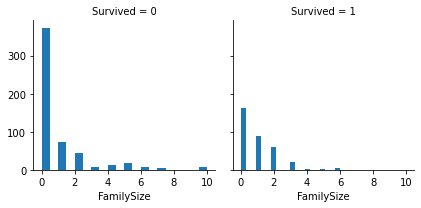

In [27]:
S=sns.FacetGrid(df,col='Survived')
S.map(plt.hist,'FamilySize',bins=20)